In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
data= pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [3]:
#Glance at the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Introduction

- Summary of stats given on biopsy images
- Data about breast cancer biopsy images with 569 patients screened 
- Out 569 patient biopsies: 212 are malignant (coded as "M") and 357 are benign (coded as "B") 
- Classification problem to predict malignant / benign biopsies with malignant as our positive class

## Future Steps

#### 1. Data Cleaning
* [x] Unique IDs
* [x] Check for null-values
* [x] Check data types

#### 2. Train test split
* [x] Check for class imbalance

#### 3. Data Exploration
* [x] Histograms and distributions for different classes
* [x] Regression for a relevant feature for regression model

#### 4. Encoding
* [x] Encode classes as M: 1 and B: 0

#### 5. Correlation matrix
* [x] Run the correlation matrix

#### 6. Modelling
* [x] Feature preprocessing (selection)
* [x] PCA for dimentionality reduction
* [x] Run different types of models and compare performances


In [4]:
#verifying data shape
data.shape

(569, 33)

In [5]:
#Checking class balance
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
#Summary and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are non-null values in any of the features other than `Unnamed: 32` which seems to be an empty column.

There are 33 features, 31 are float64, 1 is int64 and 1 string / object. 

In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
#Checkinh ID featire uniqueness
len(data.id.unique())

569

There ae 569 unique values on `ID` feature, which confirms that there are only unique ID's for each screen. Particularily important when splitting data for model training.

In [9]:
#Sanity check for classes (only having M and B)
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

### Encoding target feature to numeric

In [10]:
#Encoding M-> 1 and B-> 0
data['Y'] = data.diagnosis == 'M'
#Sanity check on the encoding
data[['Y', 'diagnosis']]

,Y,diagnosis
0,True,M
1,True,M
2,True,M
3,True,M
4,True,M
...,...,...
564,True,M
565,True,M
566,True,M
567,True,M


In [11]:
#Second sanity check on the encoding
data.Y.value_counts()

False    357
True     212
Name: Y, dtype: int64

In [12]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
#Converting bool values to numeric
data.Y = data.Y.astype(int)

### Exploratory Data Analysis

#### Subsetting data to run exploratory data analysis

In [14]:
#Subsetting columns
cols = data.columns[2:32]

In [15]:
?pd.DataFrame.hist

In [16]:
#Decribing the dataset for checking ranges
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Y
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,1.000000


We see plenty of ranges among each feature. This suggest that centering and scaling could be a good option before using the data to train the model.

##### Computing histograms grouped by classes to check on the differences in feature distribution

radius_mean


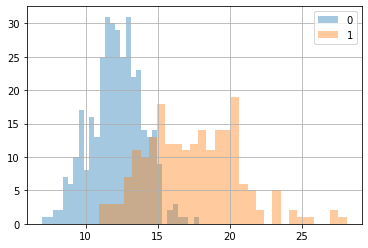

texture_mean


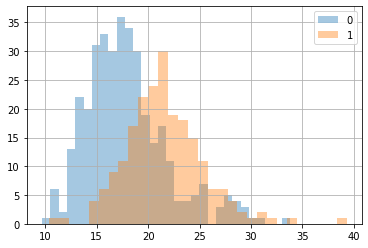

perimeter_mean


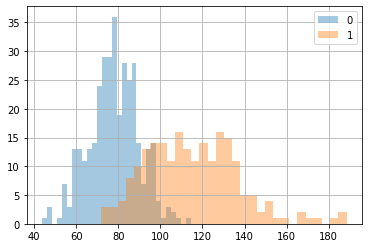

area_mean


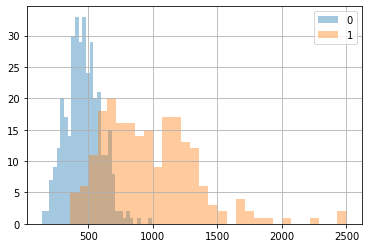

smoothness_mean


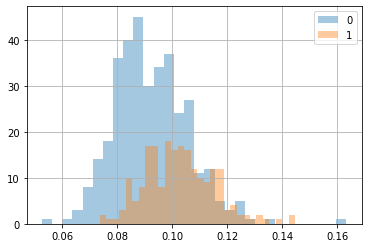

compactness_mean


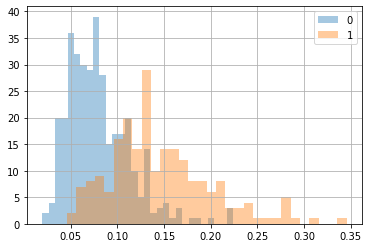

concavity_mean


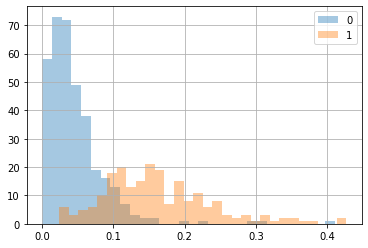

concave points_mean


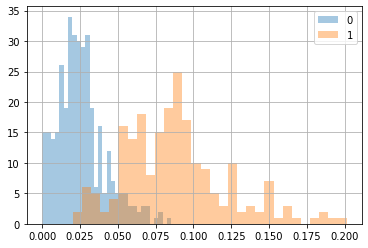

symmetry_mean


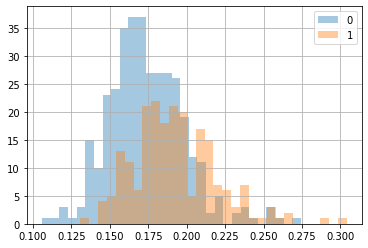

fractal_dimension_mean


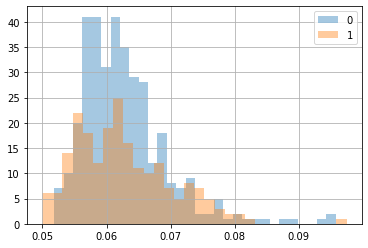

radius_se


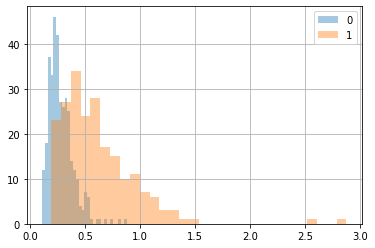

texture_se


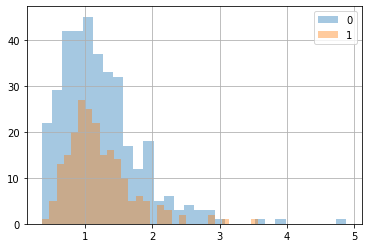

perimeter_se


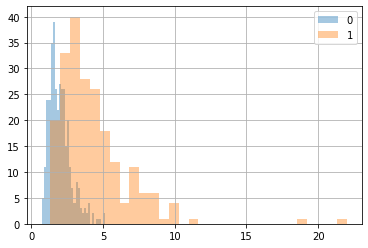

area_se


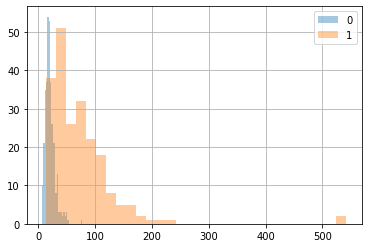

smoothness_se


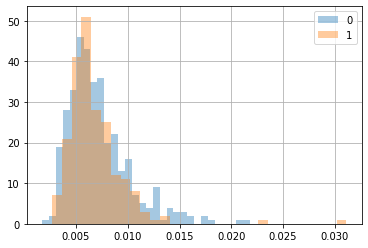

compactness_se


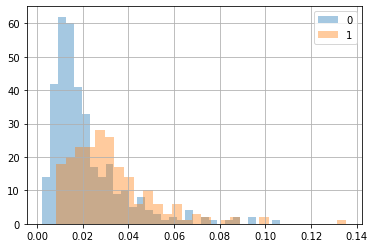

concavity_se


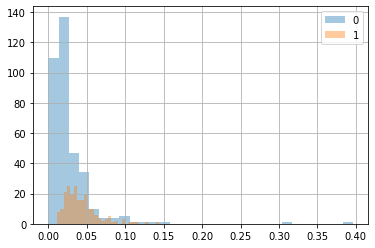

concave points_se


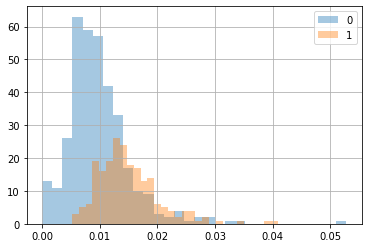

symmetry_se


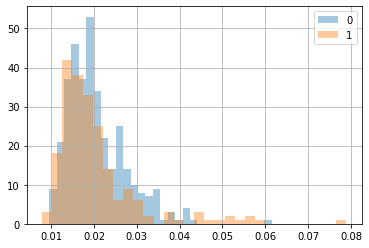

fractal_dimension_se


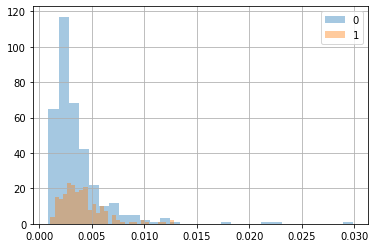

radius_worst


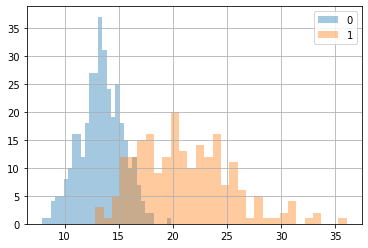

texture_worst


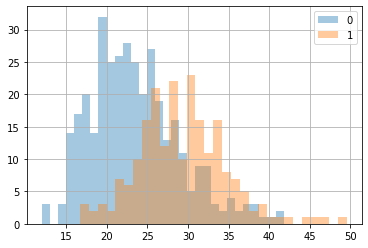

perimeter_worst


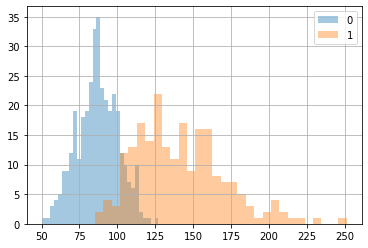

area_worst


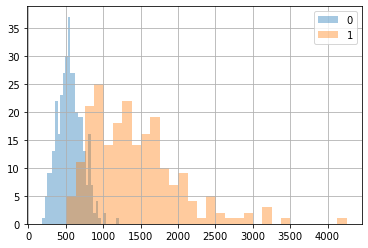

smoothness_worst


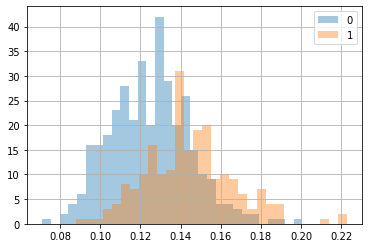

compactness_worst


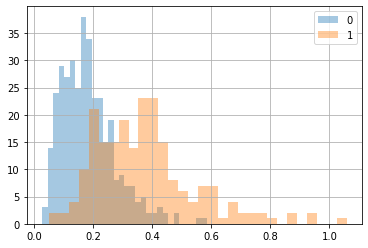

concavity_worst


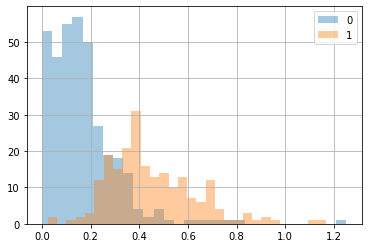

concave points_worst


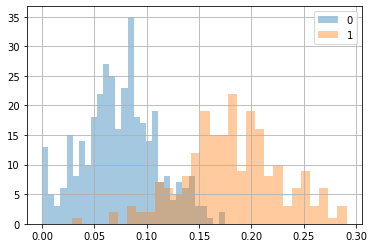

symmetry_worst


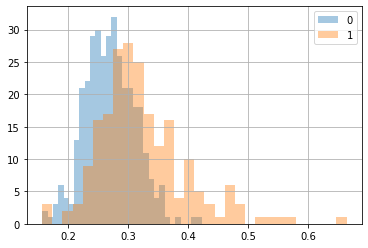

fractal_dimension_worst


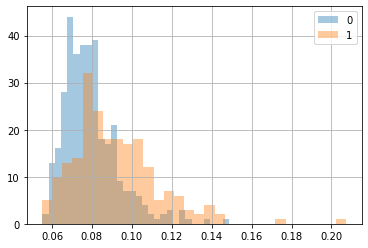

In [17]:
#Plotting histograms with legends (0: Bening, 1: Malignant)
for column in cols:
    print(column)
    data.groupby(by='Y')[column].hist(bins=30, alpha=0.4, legend='Y')
    plt.show()

From the histograms we can see that:

- `radius_mean`
- `concave points_mean`
- `radius_worst`
- `perimeter_worst`
- `concave points_worst` 
- `area se`

Are some of the features that show greater distribution differences between Malignant and Benign classes. Suggesting that the main differences between M / B biopsies could be mainly related to geometry of the sample.

In this step, we will plot a correlation matrix of all fatures that can help us in identifying which ones are highly correlated and therefore, which ones to keep.

<AxesSubplot:>

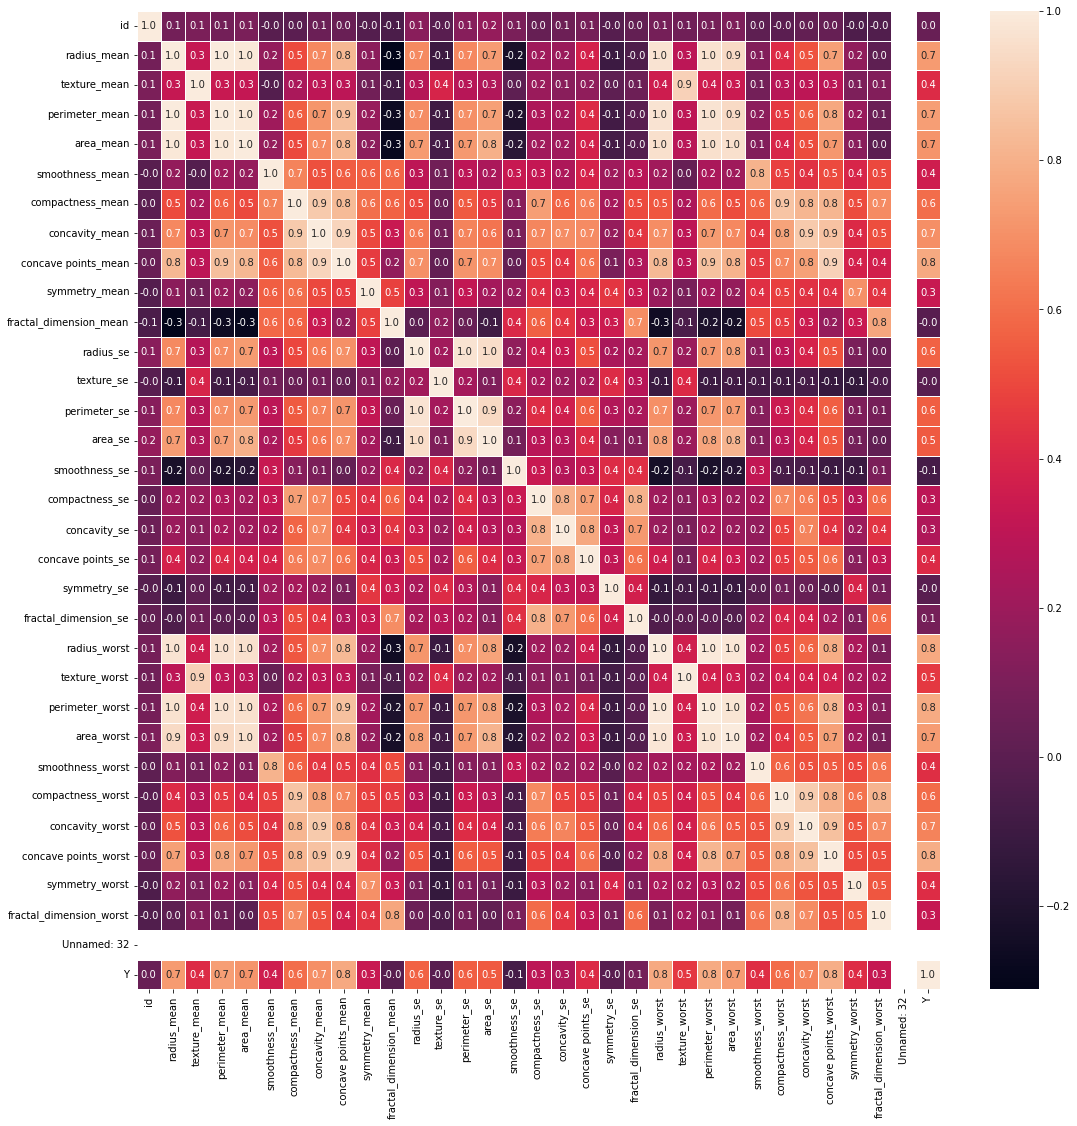

In [18]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f')

### Modeling

__The first model (baseline) we will try is a Random Forest including ALL features as explanatory variables and 'Y' feature as the target__

In [19]:
X = data.drop(['Unnamed: 32', 'Y', 'id', 'diagnosis'], axis='columns').values #independent variables
y = data['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Including all features
rf_cl = RandomForestClassifier()
rf_cl.fit(X_train, y_train)
y_pred = rf_cl.predict(X_test)
acc_s = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:
print('The accuracy score for the baseline model is: ', acc_s)

The accuracy score for the baseline model is:  0.9649122807017544


Not bad at all! Let's check the Classification Report

In [21]:
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



The recall statistic is giving us encouraging results (0.99 and 0.94 respectively on each class [0, 1]) 

__The second model we are trying is still a Random Forest but choosing only the features that showed significantly different distributions according to the classes (shown in the histograms above)__

In [22]:
#Including only features selected baes on the dist
X = data[['radius_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst', 'area_se']].values #independent variables
y = data['Y'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
rf_cl = RandomForestClassifier()
rf_cl.fit(X_train, y_train)
y_pred = rf_cl.predict(X_test)
acc_s = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [25]:
print('The accuracy score for the baseline model is: ', acc_s)

The accuracy score for the baseline model is:  0.9590643274853801


Not bad. However the accuracy is smaller than our baseline model. Which suggest that it may be some steps worth trying when using this feature selection approach. Let's see the Classification Report.

In [26]:
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



The recall difference between classes is almost the same as in our baseline model (4)

#### PCA

Since we have plenty of explanatory variables (31). A dimensionality reduction is worth trying. What we will do here, is take 15 principal components and save the data so we can input it to the same model we have been using (Random Forest)

In [27]:
#Getting the principal components
pca = PCA(n_components=15) #Check the explained variance, plot
x = data.iloc[:,2:32].values
principalComponents = pca.fit_transform(x)

In [28]:
#Saving the PC to a dataframe for modeling and renaming the columns for readability
principalDF = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15'])

In [29]:
#Glance at the PCA
principalDF.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,-0.307804,0.043452,0.034777,0.065069,-0.012934
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,0.080642,0.033042,0.045485,-0.005534,0.021368
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,0.279174,-0.020464,0.083505,0.024824,-0.026887
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,0.927471,-0.174720,0.282556,0.080057,0.043201
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,0.042228,-0.062721,-0.114247,0.002274,-0.019548


In [30]:
#Setting explanatory and target variables
X = principalDF.values
y = data['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
#Training the model using PCA dataframe with only 15 components
rf_cl = RandomForestClassifier()
rf_cl.fit(X_train, y_train)
y_pred = rf_cl.predict(X_test)
acc_s = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [32]:
print('The accuracy score for the baseline model is: ', acc_s)

The accuracy score for the baseline model is:  0.9649122807017544


Not the best performer. However, the accuracy score is almost 96%.

In [33]:
print(class_report) #Precision and recall are important to consider while selecting a model
#Recall as the scoring function 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Look at that! Even though this model is not the best performer, the recall differences between classes is the smallest compared to the prior 2 models computed. Which is something to consider.

### Future work

* On the pre-processing stage, centering and scaling data to check if we can get a performance improvement
* With the correlation matrix, make a better selection of features
* For the PCA, plot the explained variance and make a better selection of how many components shall we choose
* Test with different types of models (such as logistic regression, SVM, KNN) and compare their performance
* Run cross validation analysis on the models
* Find other dataset with similar fatures with more data
* Different population or demographics 